# **`Bank Churn Analysis 🏛️`**

### **A Data Detective's Tale: 🕵️‍♂️**
Embark on this investigative journey through the ledgers and accounts, where figures whisper secrets and categories reveal motives. Prepare for a deep dive into the heart of banking data, where every transaction is a piece of the puzzle, and every anomaly could be the key to solving the mystery. 🕵️‍♂️✨

<img src="./data/bank.png" alt="Cover Photo" width="600" height="600"/>

---



## `About Author:`


- Name: Hamza Shakeel
- LinkedIn: https://www.linkedin.com/in/hamza-shakeel-xdyyy/
- Email: hamzashakeel3214@gmail.com
- Kaggle: https://www.kaggle.com/hamzashakeel30

---

## **Introduction**

**Context:**
In the competitive environment of the banking industry, customer retention is crucial. Understanding the factors that lead to customer churn can help in developing effective strategies to retain clients. This analysis aims to uncover insights into customer behavior and predict potential churn, providing actionable recommendations to decrease the churn rate.

**Dataset Description:**
The Bank Churn dataset typically contains details about a bank's customers and indicates whether they have left the bank (churned) or not. This information is crucial for the bank to understand the factors leading to customer attrition and devise strategies to improve customer retention.


#  **Objectives:**

- Perform an in-depth analysis of the dataset to understand the characteristics of bank customers.
- Identify the key drivers of customer churn.
- Provide actionable insights and recommendations to reduce customer churn based on the analysis.
- I will train following models to predict the customer churn:
    - Decision Tree
    - Random Forest
    - XGBoost
    

# **Dataset Overview:**
The dataset includes various details about bank customers, such as personal information, financial behaviors, and whether or not they have exited the bank (churned). This exploratory data analysis (EDA) aims to understand the factors that contribute to customer churn and identify patterns and relationships within the data.

# `Data Description:`

- id: A unique identifier for each record. 🔍

- CustomerId: Unique identifier for the customer. 🆔

- Surname: Last name of the customer. 📛

- CreditScore: The credit score of the customer. 💳

- Geography: The country of the customer. 🌍

- Gender: The gender of the customer. 👤

- Age: The age of the customer. 🎂

- Tenure: Number of years the customer has been with the bank. ⏳

- Balance: Bank balance of the customer. 💰

- NumOfProducts: Number of bank products the customer is using. 🏦

- HasCrCard: Indicates whether the customer has a credit card (1) or not (0). 💳

- IsActiveMember: Indicates whether the customer is an active member (1) or not (0). 💡

- EstimatedSalary: Estimated salary of the customer. 💵

- Exited: Indicates whether the customer has churned (1) or not (0). 🚪

## **1. Data Acquisition & Understanding the Scene** 🧐🕵️

First, we need to import the libraries and load the dataset and familiarize ourselves with it's basic structure.
We'll check the top rows, understand the types of data we're dealing with, and identify our primary suspects (variables). 

- **Importing the libraries we'll be using for this analysis.**

In [506]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# machine learning
from sklearn.model_selection import train_test_split

#for classification tasks
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, precision_score ,f1_score, recall_score, confusion_matrix, classification_report

#remove warnings
import warnings
warnings.filterwarnings('ignore')


- **Loading the dataset and checking the top 7 rows.**

In [507]:
# load the data
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

df_train.head(7)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0


#### 📜**The Data's Tale - Deciphering the Dataset's Diary**

Once upon a data frame, in the realm of rows and columns, we embark on a quest to acquaint ourselves with the characters of our story—the variables. With the magical spell `df_train.info()`, we shall peer through the pages of this digital diary, understanding the essence of each column, the completeness of every row, and the tale they all weave together. Let's turn the page and begin our journey into the heart of our dataset, where numbers and categories dance in harmony, waiting to narrate their story. 🕵️‍♂️📚✨

In [508]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [509]:
df_train.shape

(165034, 14)

In [510]:
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

---

### **🕵️ `Scene Investigation` 🧹**

**Dataset Dimensions:**
- Our dataset is quite vast, containing `165034 records` (customers) and `14 attributes` (features) each. 📈

**Missing Values:**
- At first glance, it seems there are no missing values. Our dataset appears neat, but we'll keep a keen eye; appearances can be deceptive. 👀

**Data Types:**

- We have a mix of data types, including `int64`, `float64`, and `object`. We'll need to convert the categorical variables to numerical for analysis. 📊

- Numerical: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited 📊
- Categorical: CustomerId, Surname, Geography, Gender 👤
- Identifiers: id (Note: Typically, identifiers don't hold meaningful information for analysis) 🔑

`Why CustomerId is not a numerical data type?` 🤔

- "CustomerId serves as a unique tag for each customer, not meant for mathematical operations but for distinguishing individual records, akin to a name rather than a number." 🆔

---



# **2. Deciphering the Clues - Univariate Analysis** 🕵️

### **A Detective's First Look at the Evidence** 🧐

- Before we venture into the meticulous mission of data cleaning, let's take a moment to acquaint ourselves with the cast of our narrative 
— the columns. Each column is a character in our tale, rich with its own background and secrets. We shall embark on a preliminary exploration, a prologue if you will, where we delve into the essence of each column, understanding its role and significance in our dataset's story. 🕵️‍♂️🔍

- We'll approach each column with a keen eye, understanding it's story, and listening to what it has to tell us. These are the initial clues in our investigation, the first whispers of the secrets that lie hidden in the numbers and categories. 🕵️‍♂️🔍

  So, let's begin our journey, stepping into the shoes of a data detective, unraveling the mysteries one column at a time. Each piece of data is a piece of the puzzle, and it's our job to put them all together. Ready your magnifying glass, for it's time to examine the clues closely before we proceed to clean and polish them in the next chapter. `The adventure of analysis awaits! 🎩✨`

## **Clue 1: CreditScore**

Let's delve into the first clue: `CreditScore`. This numerical figure is not just a number; it's a narrative about a customer's creditworthiness and financial reliability. High and low scores whisper different tales of fiscal behavior and trust.

In [511]:
max_credit_score= df_train["CreditScore"].max()
min_credit_score= df_train["CreditScore"].min()
print("Max Credit Score:",max_credit_score)
print("Min Credit Score:",min_credit_score)

Max Credit Score: 850
Min Credit Score: 350


In [512]:
df_train["CreditScore"].nunique()

457

In [513]:
# Statistical Summary of 'CreditScore'
credit_score_stats = df_train['CreditScore'].describe()
credit_score_stats

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64


#### **Clue 1: CreditScore - Statistical Observations:**

---
1. `Count:` The trail of CreditScore is quite extensive, with 165,034 entries.

2. `Mean (Average):` The average CreditScore in our dataset is about 656, suggesting a moderately high creditworthiness among the populace.

3. `Standard Deviation:` A deviation of approximately 80 indicates variability in the credit scores, hinting at a diverse financial disposition 
among the customers.

4. `Minimum:` The lowest CreditScore recorded is 350, a tale of financial distress or a fledgling credit history

5.  `25th Percentile:` At least a quarter of our customers have scores below 597, navigating the lower echelons of creditworthiness.
   
6. `Median (50th Percentile):` The median score is 659, painting a picture of the typical customer – more than just numbers, it's a balance point in our tale of fiscal trust.

7. `75th Percentile:` Climbing to a score of 710, we see the upper quartile where customers are deemed more financially reliable.

8. `Maximum:` The peak of creditworthiness hits 850, a score where customers stand as paragons of financial virtue.

---

#### **Visual Examination**

- Next, we'll plot the distribution of CreditScore. This visual plot will help us better understand the distribution and identify any anomalies or patterns in the data.

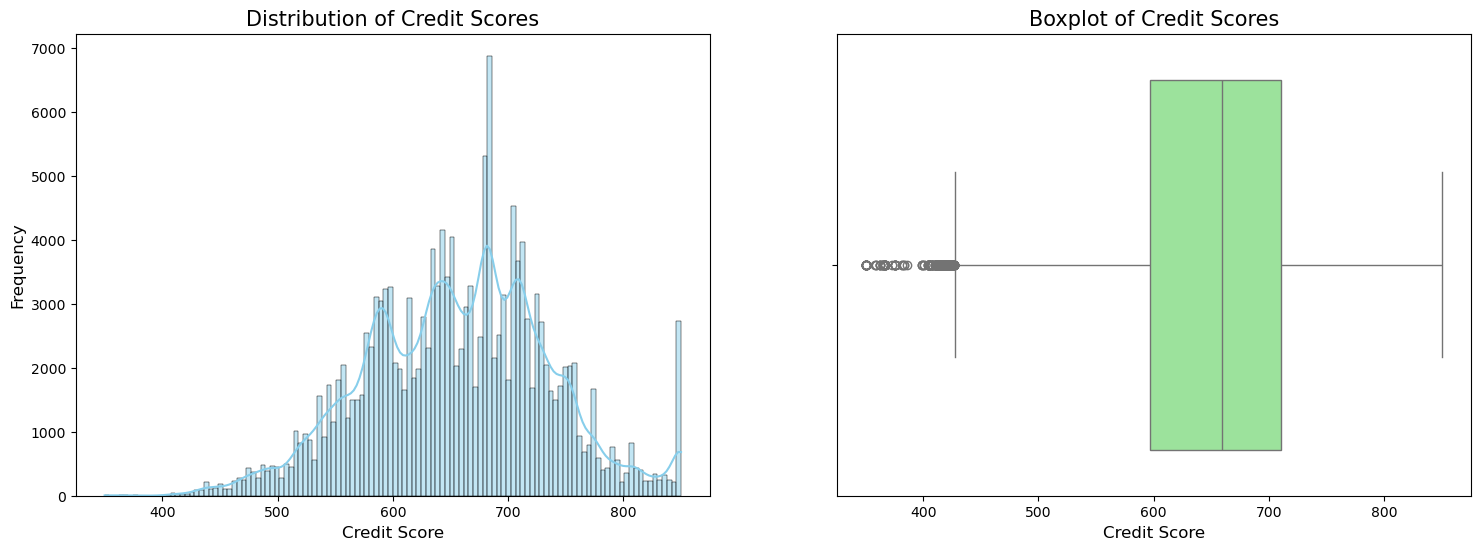

In [514]:
# Setting a professional color palette
sns.set_palette("Paired")

# Plotting the histogram and boxplot for 'CreditScore' with the new color palette
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram
sns.histplot(df_train['CreditScore'], kde=True, ax=ax[0], color="skyblue")
ax[0].set_title('Distribution of Credit Scores', fontsize=15)
ax[0].set_xlabel('Credit Score', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

# Boxplot
sns.boxplot(x=df_train['CreditScore'], ax=ax[1], color="lightgreen")
ax[1].set_title('Boxplot of Credit Scores', fontsize=15)
ax[1].set_xlabel('Credit Score', fontsize=12)

# Display the plots with the professional color palette
plt.show()


#### **Clue 1: CreditScore - Visual Insights:**

---

**Observation from Distribution of Credit Scores (Histogram):**

1. The distribution seems fairly normal, hinting at a balanced financial narrative across our customer base.
2. There's a slight left skew, indicating a minor tale of customers with lower credit scores. This tail whispers stories of financial challenges or younger credit histories.

**Observation from Boxplot of Credit Scores:**

3. The boxplot confirms the presence of a median around 659, consistent with our statistical analysis.
4. The whiskers extend to the minimum and maximum scores, and there don't appear to be any significant outliers beyond the typical range of credit scores.

**`Key Takeaway:`**
The plot thickens as the CreditScore unveils tales of financial reliability and trust. With this insight, we're one step closer to understanding the financial saga of our customers. 🕵️‍♂️🔍

---

## **Clue 2: Age**

Now, we turn our investigative lens towards the second clue: `Age`. This number is not just a figure; it represents the life stage of a customer, potentially influencing their financial behavior and needs.

In [515]:
df_train["Age"].nunique()

71

In [516]:
max_age= df_train["Age"].max()
min_age= df_train["Age"].min()
print("Max Age:",max_age)
print("Min Age:",min_age)

Max Age: 92.0
Min Age: 18.0


In [517]:
# Statistical Summary of 'Age'
age_stats = df_train['Age'].describe()
age_stats


count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

#### **Clue 2: Age - Statistical Observations:**
---
1. `Count:` There are 165,034 records, each narrating a customer's age.

2.  `Mean (Average):` The average age is approximately 38.13 years, suggesting a clientele in their prime working age.
   
3. `Standard Deviation:` With a deviation of about 8.87 years, there's a notable spread in ages, reflecting a diverse customer base.

4. `Minimum:` The youngest patron in the dataset is 18 years old, just stepping into the financial world.

5. `25th Percentile:` A quarter of the customers are younger than 32 years, representing the younger demographic.

6. `Median (50th Percentile):` The median age is 37 years, indicating that half of the customers are younger than this age.

7. `75th Percentile:` Climbing to 42 years, we see the more experienced segment of our customer base.

8.  `Maximum:` The oldest customer is 92 years old, a testament to a lifetime of financial journeys.

---

#### **Visual Examination**

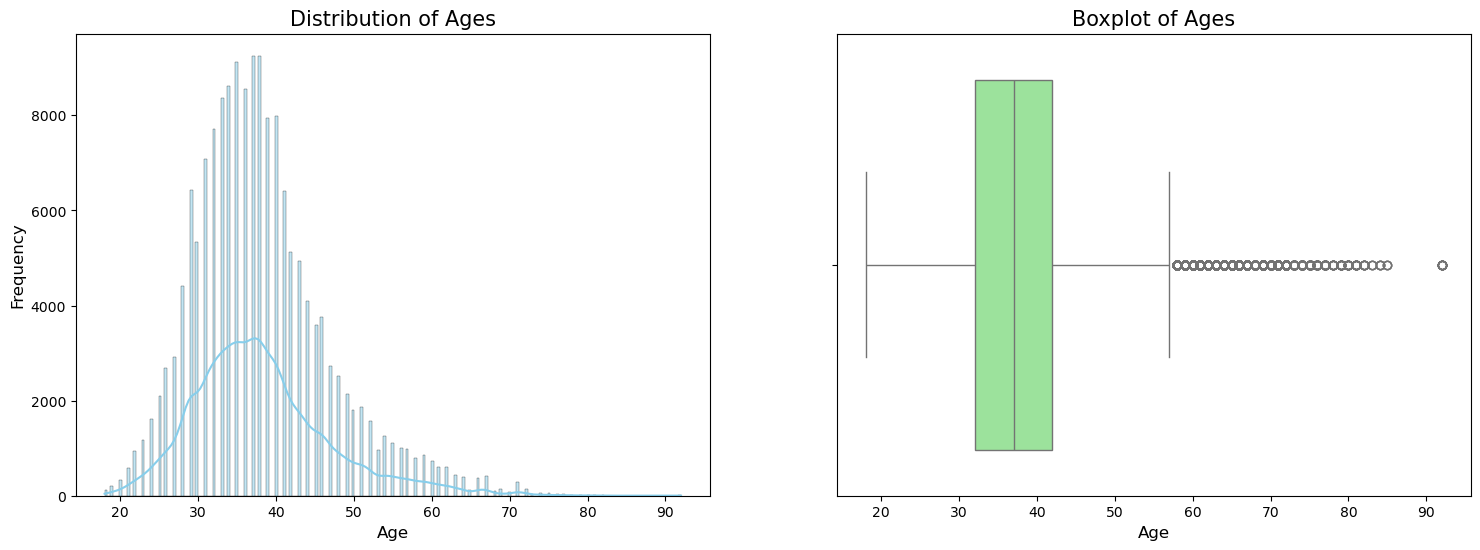

In [518]:
# Plotting the histogram and boxplot for 'Age' with the professional color palette
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram
sns.histplot(df_train['Age'], kde=True, ax=ax[0], color="skyblue")
ax[0].set_title('Distribution of Ages', fontsize=15)
ax[0].set_xlabel('Age', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

# Boxplot
sns.boxplot(x=df_train['Age'], ax=ax[1], color="lightgreen")
ax[1].set_title('Boxplot of Ages', fontsize=15)
ax[1].set_xlabel('Age', fontsize=12)

# Display the plots with the professional color palette
plt.show()


#### **Clue 2: Age - Visual Insights:**

---

**Observation from Distribution of Ages (Histogram):**

1. The histogram exhibits a right-skewed distribution, indicating a larger number of younger customers compared to older ones.
2. The peak is observed in the early to late 30s, aligning with the median age observed in the statistical summary.

**Observation from Boxplot of Ages:**

3. The boxplot reveals the median around 37 years, consistent with our previous findings.
4. The presence of several points beyond the upper whisker suggests potential outliers. These points represent customers significantly older than the majority, hinting at a tale of seasoned financial journeys.

**Interpretation of Outliers:**

The presence of outliers in the `Age` variable suggests a significant number of customers who are older than the typical customer base. These customers, aged 58 and above, represent a distinct segment, potentially with different financial needs and behaviors compared to the younger cohorts. Their higher age might be indicative of different stages in the financial lifecycle, such as nearing or being in retirement, which could influence their banking and financial decisions.

**`Key takeaway:`**

The presence of this older segment is non-negligible and could be crucial for certain types of analysis, especially those related to products or services tailored to older individuals.

---

## **Clue 3: Tenure**

We turn our investigative focus towards the third clue: `Tenure`. This numeric variable narrates the duration of the customer's relationship with the bank. It's a tale of loyalty and continuity, where each number carries the weight of commitment and history.

In [519]:
max_tenure= df_train["Tenure"].max()
min_tenure= df_train["Tenure"].min()
print("Max Tenure:",max_tenure)
print("Min Tenure:",min_tenure)

Max Tenure: 10
Min Tenure: 0


In [520]:
df_train["Tenure"].unique()

array([ 3,  1, 10,  2,  5,  4,  8,  6,  9,  7,  0], dtype=int64)

In [521]:
df_train["Tenure"].nunique()

11

In [522]:
# Statistical Summary of 'Tenure'
tenure_stats = df_train['Tenure'].describe()
tenure_stats


count    165034.000000
mean          5.020353
std           2.806159
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Tenure, dtype: float64

In [523]:
# 10 years of tenure
tenure_10 = df_train[df_train['Tenure'] == 10].shape[0]
print('Number of customers with 10 years of tenure:', tenure_10)

Number of customers with 10 years of tenure: 5909


In [524]:
# 0 years of tenure
tenure_0 = df_train[df_train['Tenure'] == 0].shape[0]
print("The number of customers with 0 years of tenure:", tenure_0)

The number of customers with 0 years of tenure: 5007


#### **Clue 3: Tenure - Statistical Observations:**

--- 

1. `Count:` The dataset contains 165,034 records of customer tenures.

2. `Mean (Average):` The average tenure is approximately 5.02 years, suggesting a moderate duration of customer-bank relationships.

3. `Standard Deviation:` With a deviation of about 2.81 years, there's a considerable spread in tenures, indicating diverse lengths of customer relationships.

4. `Minimum:` The shortest tenure is 0 years, possibly indicating new customers or very recent relationships.

5. `25th Percentile:` A quarter of the customers have been with the bank for 3 years or less.

6. `Median (50th Percentile):` The median tenure is 5 years, marking the midpoint of customer loyalty duration.

7. `75th Percentile:` Climbing to 7 years, we see a segment of customers demonstrating a longer commitment.

8. `Maximum:` The maximum tenure recorded is 10 years, showcasing a decade-long bond between the customers and the bank.

---

#### **Visual Examination**

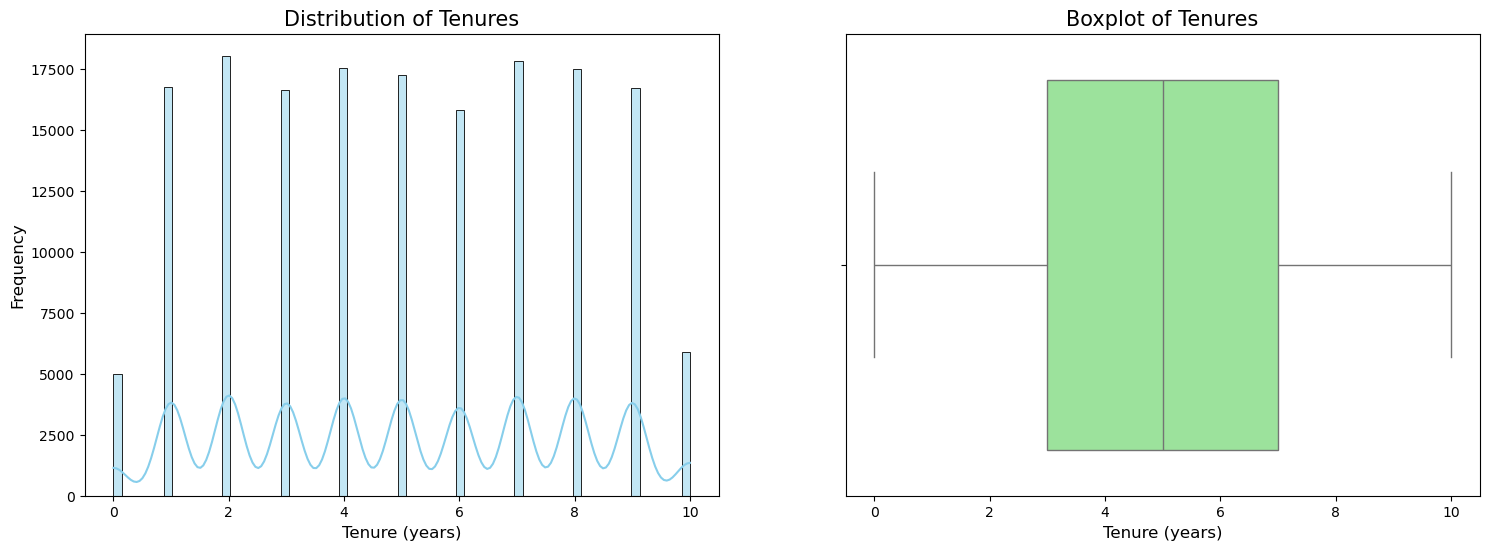

In [525]:
# Plotting the histogram and boxplot for 'Tenure' with the professional color palette
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram
sns.histplot(df_train['Tenure'], kde=True, ax=ax[0], color="skyblue")
ax[0].set_title('Distribution of Tenures', fontsize=15)
ax[0].set_xlabel('Tenure (years)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

# Boxplot
sns.boxplot(x=df_train['Tenure'], ax=ax[1], color="lightgreen")
ax[1].set_title('Boxplot of Tenures', fontsize=15)
ax[1].set_xlabel('Tenure (years)', fontsize=12)

# Display the plots with the professional color palette
plt.show()


#### **Clue 3: Tenure - Visual Insights:**

---

**Observation from Distribution of Tenures (Histogram):**

1. The histogram shows a fairly uniform distribution across different tenure lengths, with a slight decrease for the 0 and 10-year tenures.
2. This uniform distribution suggests that the bank has a steady inflow of customers and a relatively consistent retention rate across different tenure lengths.

**Observation from Boxplot of Tenures:**

3. The boxplot confirms a median tenure of 5 years, aligning with our statistical analysis.
4. There are no significant outliers in the data, as the tenure lengths range neatly from 0 to 10 years.

**`Key takeaway:`**

The visual and statistical analysis of Tenure reveals a balanced tenure distribution, suggesting a steady customer-bank relationship dynamic. The tenure lengths are well spread out, indicating a diverse range of relationship durations among the customers.

---



## **Clue 4: Balance**

We now focus our investigative lens on the fourth clue: 'Balance'. This numeric variable tells a rich story of a customer's financial stature. It's a tale of wealth, savings, and perhaps the subtleties of spending habits.

In [526]:
df_train["Balance"].nunique()

30075

In [527]:
max_balance= df_train["Balance"].max()
min_balance= df_train["Balance"].min()
print("Max Balance:",max_balance)
print("Min Balance:",min_balance)

Max Balance: 250898.09
Min Balance: 0.0


In [528]:
# Statistical Summary of 'Balance'
balance_stats = df_train['Balance'].describe()
balance_stats


count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

#### **Clue 4: Balance - Statistical Observations:**

--- 

1. `Count:` The dataset encompasses 165,034 records of customer balances.

2. `Mean (Average):` The average balance is about €55,478.09, but this number might be deceptive due to the spread and distribution of balances.

3. `Standard Deviation:` A high standard deviation of approximately €62,817.66 indicates a wide range of balances, hinting at significant diversity in financial wealth among customers.

4. `Minimum:` The minimum balance is €0.00, possibly indicating customers who have just opened their accounts or prefer to keep their funds elsewhere.

5. `25th Percentile:` 25% of the customers have a balance of €0.00, suggesting a substantial segment of customers might not maintain a balance in their accounts.

6. `Median (50th Percentile):` The median balance is also €0.00, reinforcing the observation that a significant portion of customers have low or no balance in their accounts.

7. `75th Percentile:` Climbing to €119,939.52, we see the upper quartile of customers who hold higher balances, indicating a segment with greater financial holdings.

8. `Maximum:` The maximum balance recorded is €250,898.09, showcasing substantial wealth for certain customers.

#### **Visual Examination**

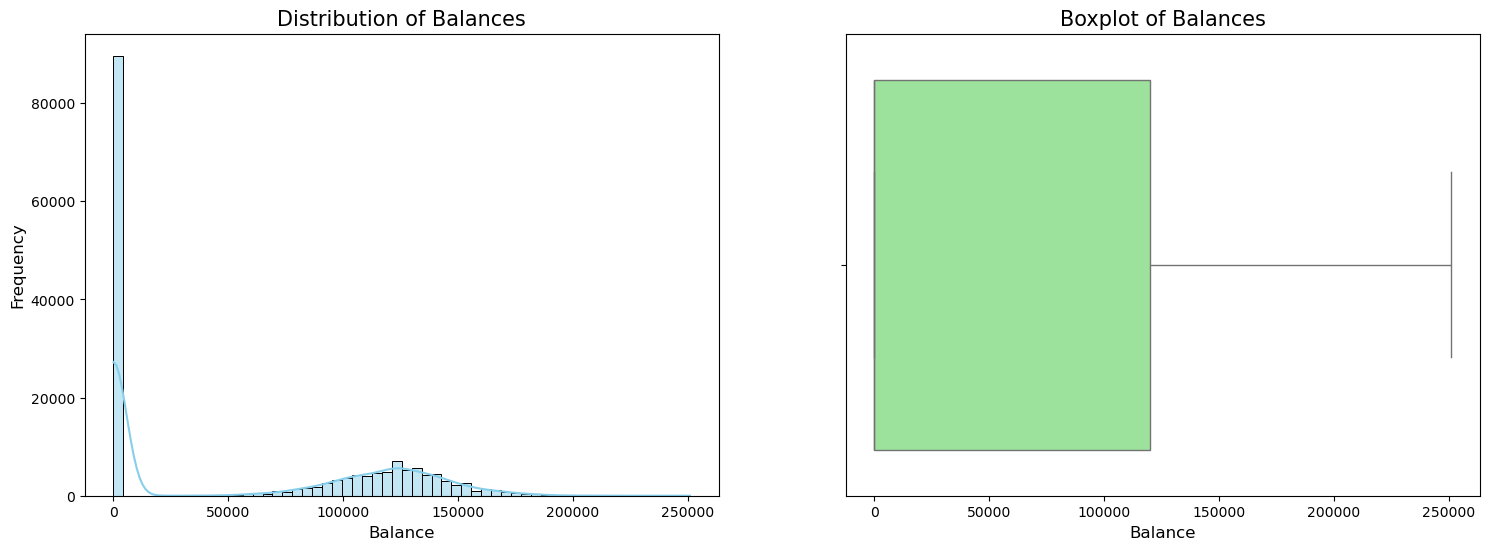

In [529]:
# Plotting the histogram and boxplot for 'Balance' with the professional color palette
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram
sns.histplot(df_train['Balance'], kde=True, ax=ax[0], color="skyblue")
ax[0].set_title('Distribution of Balances', fontsize=15)
ax[0].set_xlabel('Balance', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

# Boxplot
sns.boxplot(x=df_train['Balance'], ax=ax[1], color="lightgreen")
ax[1].set_title('Boxplot of Balances', fontsize=15)
ax[1].set_xlabel('Balance', fontsize=12)

# Display the plots with the professional color palette
plt.show()


#### **Clue 4: Balance - Visual Insights:**

---

**Observation from Distribution of Balances (Histogram):**

1. The histogram shows a notable spike at the $0 balance mark, indicating a substantial number of customers with little to no balance in their accounts.
2. Apart from the peak at $0, the distribution of non-zero balances appears somewhat uniform, with a gradual decline as the balance increases.
   
**Observation from Boxplot of Balances:**

3. The boxplot underscores the concentration of lower balances, with the median at $0. The interquartile range starts from $0, stretching to a higher balance, indicating variability among customers who do maintain a balance.


**`Key takeaway:`**

Given the significant number of customers with a €0 balance, the bank might consider:

1. Implement targeted engagement and financial education programs to encourage customers to actively use and maintain balances in their accounts.
2. Develop and promote financial products such as attractive savings schemes or investment options tailored to encourage account utilization and cater to the specific needs of this segment.

---

## **Clue 5: NumOfProducts**

How many financial products does each customer use? This clue could reveal how deeply customers are engaged with the bank's offerings.

In [530]:
# Statistical Summary of 'NumOfProducts'
num_of_products_stats = df_train['NumOfProducts'].describe()
num_of_products_stats


count    165034.000000
mean          1.554455
std           0.547154
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: NumOfProducts, dtype: float64

In [531]:
df_train["NumOfProducts"].unique()

array([2, 1, 3, 4], dtype=int64)

In [532]:
# total number of customers with 4 products
num_of_products_4 = df_train[df_train['NumOfProducts'] == 4].shape[0]
print('Number of customers with 4 products:', num_of_products_4)

Number of customers with 4 products: 475


In [533]:
# total number of customers with 0 products
num_of_products_0 = df_train[df_train['NumOfProducts'] == 0].shape[0]
print('Number of customers with 0 products:', num_of_products_0)

Number of customers with 0 products: 0


#### **Clue 5: NumOfProducts - Statistical Observations:**

--- 

1. `Count:` The dataset contains records of 165,034 customers, each associated with their number of products.

2. `Mean (Average):` On average, customers use about 1.55 products from the bank.

3. `Standard Deviation:` With a deviation of about 0.55, there's some variability in the number of products used, but it's relatively low.

4. `Minimum:` The minimum number of products used by a customer is 1.

5. `25th Percentile:` 25% of the customers use only 1 product, suggesting a significant portion of the customer base prefers simplicity.

6. `Median (50th Percentile):` The median number of products is 2, indicating that half of the customers use up to 2 products.

7. `75th Percentile:` 75% of customers use 1 or 2 products, reinforcing the trend towards fewer products.

8. `Maximum:` The maximum number of products used by a customer is 4, indicating some level of diversification in product usage among certain customers.

---

#### **Visual Examination**

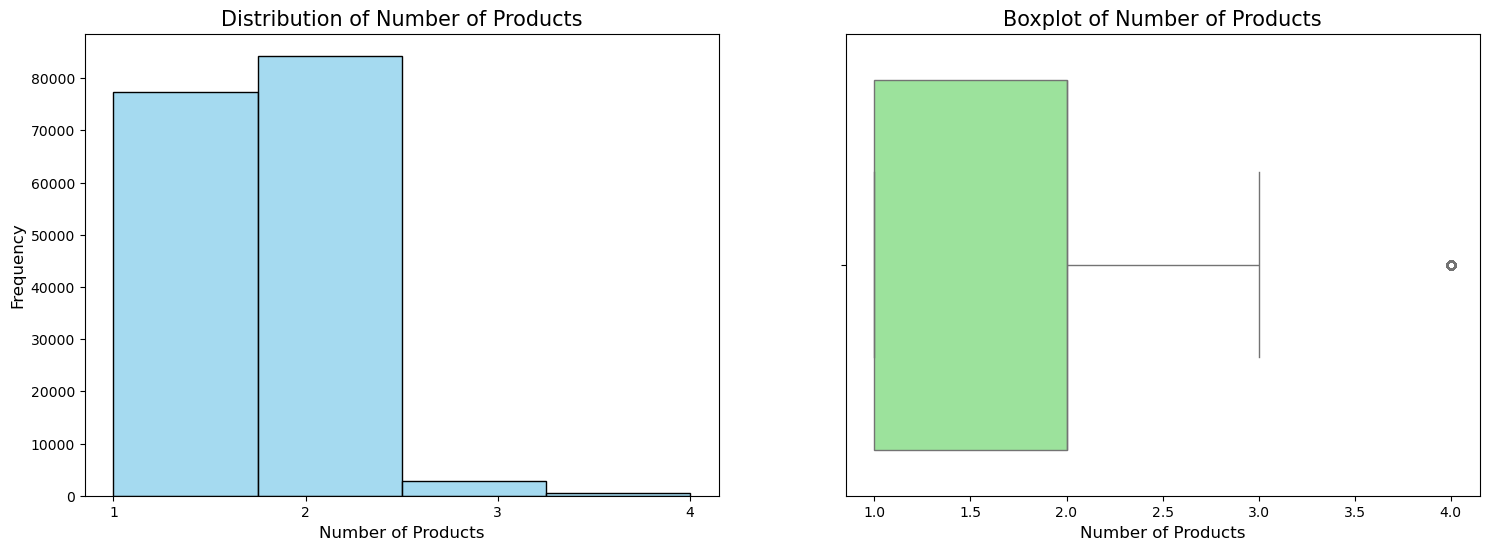

In [534]:
# Plotting the histogram and boxplot for 'NumOfProducts' with the professional color palette
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram
sns.histplot(df_train['NumOfProducts'], kde=False, ax=ax[0], color="skyblue", bins=4)
ax[0].set_title('Distribution of Number of Products', fontsize=15)
ax[0].set_xlabel('Number of Products', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].set_xticks(range(1, 5))  # Set x-ticks to show each product number

# Boxplot
sns.boxplot(x=df_train['NumOfProducts'], ax=ax[1], color="lightgreen")
ax[1].set_title('Boxplot of Number of Products', fontsize=15)
ax[1].set_xlabel('Number of Products', fontsize=12)

# Display the plots with the professional color palette
plt.show()


#### **Clue 5: NoOfProducts - Visual Insights:**

---

**Observation from Distribution of NoOfProducts (Histogram):**

1. The histogram clearly shows that the majority of customers use 1 or 2 products. The bars for 1 and 2 products are significantly taller than those for 3 and 4 products, underscoring the preference for a limited number of products.
2. The number of customers using 3 or 4 products is much lower, indicating these are less common scenarios.

**Observation from Boxplot of Number of Products:** 

3. The boxplot illustrates that the median number of products used by customers is 2.
4. There are no outliers in the distribution of NumOfProducts, and the interquartile range is narrow, suggesting most customers fall within a similar range of product usage.

**`Key takeaway:`**

The concentration of customers using only 1 or 2 products points towards a potential opportunity for the bank to increase product penetration among its customer base.

Potential for Cross-Selling: The bank might consider developing targeted cross-selling strategies, perhaps focusing on customers with only 1 product, to encourage the adoption of additional services or products.

## **Clue 6: HasCrCard**

Does the customer have a credit card issued by the bank? This variable might indicate the level of trust and financial integration between the customer and the bank.

`HasCrCard` is a binary variable, meaning it takes on two values: 1 (Yes, the customer has a credit card) and 0 (No, the customer does not have a credit card)

In [535]:
df_train["HasCrCard"].unique()

array([1., 0.])

In [536]:
# Statistical Summary of 'HasCrCard'
has_cr_card_stats = df_train['HasCrCard'].describe()
has_cr_card_stats

count    165034.000000
mean          0.753954
std           0.430707
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: HasCrCard, dtype: float64

#### **Clue 6: HasCrCard - Statistical Observations:**

--- 

Credit Card Ownership: A significant majority, about 75.4% of customers, have a credit card issued by the bank.

---

#### **Visual Examination**

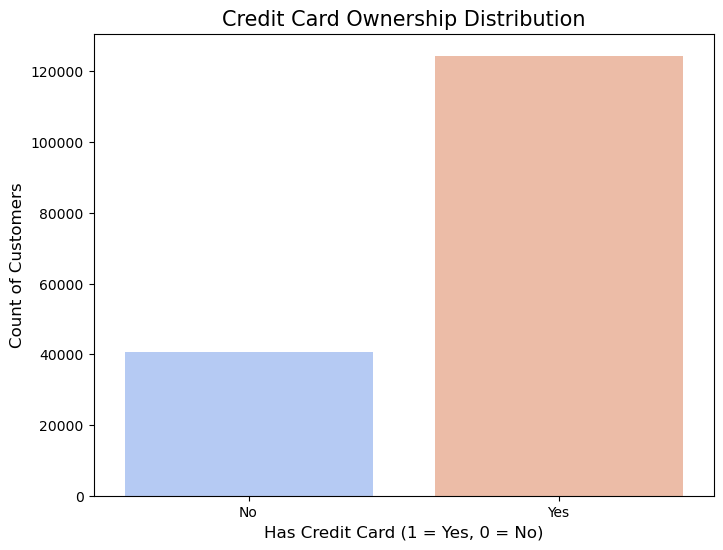

In [537]:

plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', data=df_train, palette="coolwarm")
plt.title('Credit Card Ownership Distribution', fontsize=15)
plt.xlabel('Has Credit Card (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])  # Make it clear what 0 and 1 represent
plt.show()


#### **Clue 6: HasCrCard - Visual Insights:**

---

**High Credit Card Penetration:**
 
The fact that a significant majority of customers have a credit card suggests a high level of trust and integration with the bank's credit services. It reflects the bank's success in cross-selling this product.

**Opportunity for Further Engagement:**

For customers who don't have a credit card, there might be an opportunity for the bank to engage and understand their needs or hesitations. This could involve reviewing credit card features, fee structures, or promotional offers to make the product more appealing.

**Indicator of Financial Activity:**

Credit card ownership can be an indicator of financial activity and engagement. Customers with a credit card might be more actively involved with the bank, making them prime candidates for additional services or products.

---

## **Clue 7: IsActiveMember**

`IsActiveMember` is a binary variable, providing insights into the customer's engagement level with the bank. Active members are likely more involved, utilizing the bank's services and possibly contributing more to the bank's success. On the other hand, inactive members might represent untapped potential or indicate areas where the bank could improve its engagement strategies.

In [538]:
df_train["IsActiveMember"].unique()

array([0., 1.])

In [539]:
df_train["IsActiveMember"].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

In [540]:
# Statistical Summary of 'IsActiveMember'
is_active_member_stats = df_train['IsActiveMember'].describe()
is_active_member_stats

count    165034.000000
mean          0.497770
std           0.499997
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: IsActiveMember, dtype: float64

#### **Clue 7: IsActiveMember - Statistical Observations:**

---

1. `Count (165,034):` This is the total number of customers in the dataset we're analyzing.

2. `Mean (0.497770):` On average, about 49.78% of the customers are active members. This is close to a 50/50 split, meaning almost half of the customers are considered active.

3. `Standard Deviation (0.499997):` This number is close to 0.5 because IsActiveMember is a binary variable (values are only 0 or 1). A high standard deviation here indicates that the number of active and inactive members is nearly the same, contributing to a balanced distribution.

4. `Minimum (0):` The lowest value for IsActiveMember is 0, indicating that there are customers who are not active.

5. `25th Percentile (0):` 25% of the customers are not active (inactive).

6. `50th Percentile (Median) (0):` 50% of the customers (half of them) are inactive. This aligns with the mean, reinforcing that the customers are almost evenly split between active and inactive.

7. `75th Percentile (1):` 75% of the customers are at most active, meaning if you pick three customers, two of them might be inactive and one active, or all three could be active.

8. `Maximum (1):` The highest value for IsActiveMember is 1, indicating that there are customers who are active.

---

#### **Visual Examination**

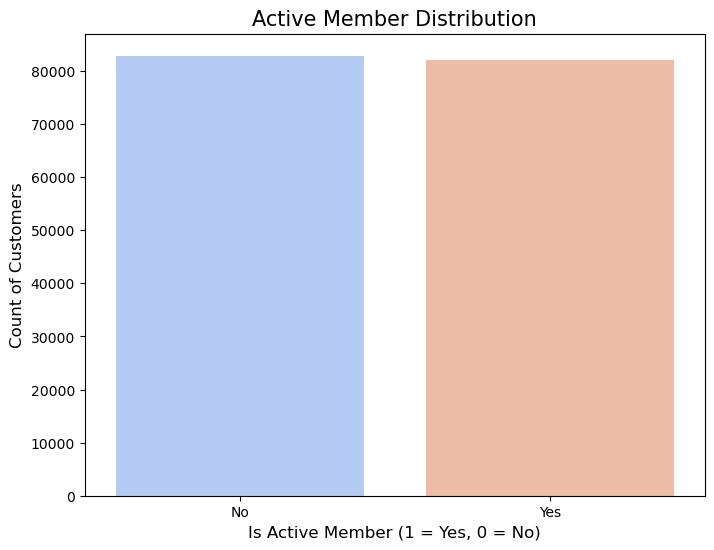

In [541]:
# Bar plot for 'IsActiveMember' with the professional color palette
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', data=df_train, palette="coolwarm")
plt.title('Active Member Distribution', fontsize=15)
plt.xlabel('Is Active Member (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])  # Make it clear what 0 and 1 represent
plt.show()


#### **Clue 7: IsActiveMember - Insights:**

---
`Balanced Engagement Levels:` 

The nearly equal distribution between active and inactive members suggests a balanced engagement level across the customer base. This balance offers both an opportunity and a challenge for the bank in terms of engagement strategies.

`Engagement Opportunities:`

 For inactive members, the bank might explore strategies to increase engagement. This could involve personalized communication, tailored product offerings, or loyalty programs. Understanding the reasons behind their inactivity could provide valuable insights for these strategies.

`Active Member Retention:`

Retaining active members could be just as crucial as converting inactive ones. The bank might focus on understanding what keeps these members engaged and ensuring those factors are maintained or enhanced.

---

## **Clue 8: EstimatedSalary**

The EstimatedSalary might subtly hint at the financial muscle and spending power of a customer. A hefty paycheck could mean more capital at play.

In [542]:
df_train["EstimatedSalary"].nunique()

55298

In [543]:
# max and min of 'EstimatedSalary'
max_estimated_salary = df_train['EstimatedSalary'].max()
min_estimated_salary = df_train['EstimatedSalary'].min()
print('Max Estimated Salary:', max_estimated_salary)
print('Min Estimated Salary:', min_estimated_salary)

Max Estimated Salary: 199992.48
Min Estimated Salary: 11.58


In [544]:
# statistical summary of 'EstimatedSalary'
estimated_salary_stats = df_train['EstimatedSalary'].describe()
estimated_salary_stats

count    165034.000000
mean     112574.822734
std       50292.865585
min          11.580000
25%       74637.570000
50%      117948.000000
75%      155152.467500
max      199992.480000
Name: EstimatedSalary, dtype: float64

#### **Clue 8: EstimatedSalary - Statistical Observations:**

---

1. `Count:` There are 165,034 customers in the dataset, each with an estimated salary figure. This count reflects the total number of salary records we're analyzing.

2. `Mean:` On average, the estimated annual salary of the customers is €112,574.82. This average gives us an indication of the general income level of the bank's customer base.

3. `Standard Deviation:` The salaries have a standard deviation of €50,292.87, suggesting a wide range of income levels among the customers. A higher standard deviation indicates more variability in the estimated salaries.

4. `Minimum Salary:` The lowest estimated salary in the dataset is only €11.58, which might be an anomaly or represent accounts with minimal activity.

5. `25th Percentile:` 25% of the customers have an estimated salary of €74,637.57 or less. This gives us a sense of the lower income bracket among the bank's customers.

6. `50th Percentile (Median):` The median estimated salary is €117,948.00. This means that half of the customers have estimated salaries below this amount, and half have salaries above it. The median provides a good sense of the 'middle' salary, especially if the salary distribution is skewed.

7. `75th Percentile:` 75% of the customers have an estimated salary of €155,152.47 or less. This provides insight into the upper-middle range of incomes among the customers.

8. `Maximum Salary:` The highest estimated salary in the dataset is €199,992.48, showcasing the presence of high-income individuals or households among the bank's customers.

---

#### **Visual Examination**

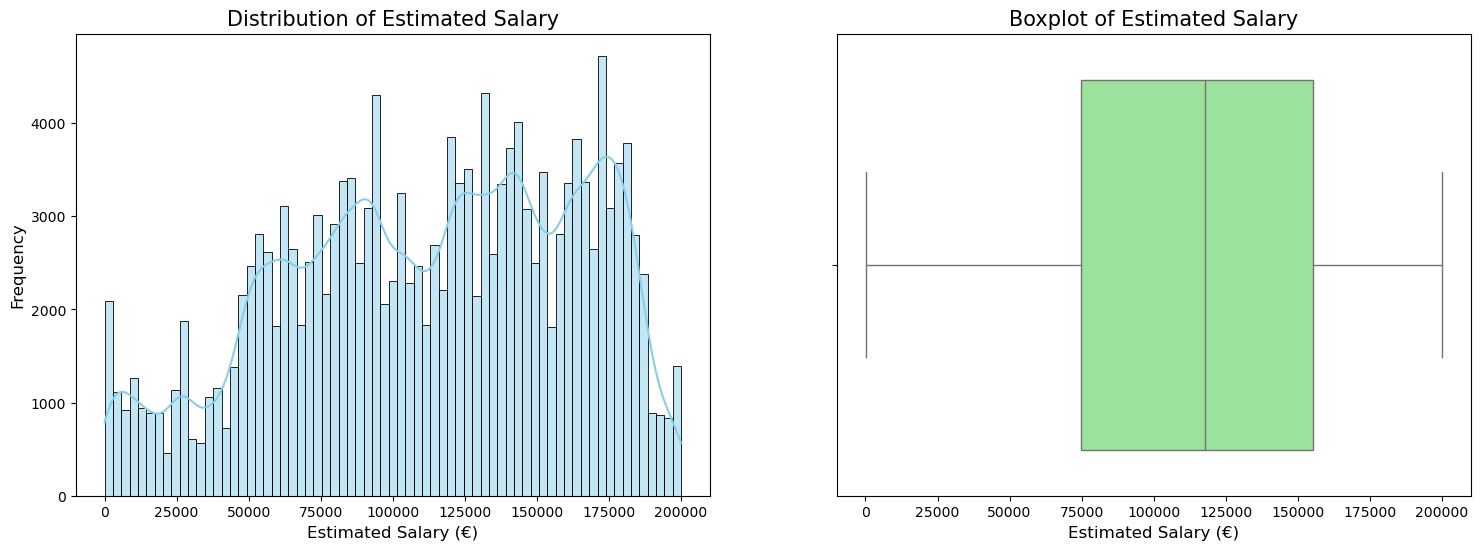

In [545]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram for 'EstimatedSalary'
sns.histplot(df_train['EstimatedSalary'], kde=True, ax=ax[0], color="skyblue")
ax[0].set_title('Distribution of Estimated Salary', fontsize=15)
ax[0].set_xlabel('Estimated Salary (€)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

# Boxplot for 'EstimatedSalary'
sns.boxplot(x=df_train['EstimatedSalary'], ax=ax[1], color="lightgreen")
ax[1].set_title('Boxplot of Estimated Salary', fontsize=15)
ax[1].set_xlabel('Estimated Salary (€)', fontsize=12)

# Display the plots
plt.show()


#### **Clue 8: Estimated Salary- Visual Insights:**

---


**Observations from Histogram of Estimated Salary:**

1. Given the wide range of salaries and a high standard deviation, we'd expect the histogram to show a broad distribution of salaries across different income brackets.

2. With a median close to the mean, there might be a concentration of salaries around the central part of the distribution, indicating that a significant portion of the bank's customers falls into the middle-income bracket.

3. Depending on the actual distribution, the histogram might show a relatively uniform spread of salaries or some degree of skewness (either left or right) if there's a tendency towards lower or higher salaries.

**Observations from Boxplot of Estimated Salary:**

4. The boxplot would clearly show the median salary at €117,948.00 and the interquartile range (from €74,637.57 to €155,152.47). This visually represents the middle 50% of salaries.
   
5. Given the minimum and maximum values, especially the very low minimum salary of €11.58, the boxplot might display outliers on the lower (and possibly higher) end of the salary spectrum.

**`Key takeaway:`**

**Potential for Cross-Selling and Upselling:**

The presence of customers across various income levels, especially those in the middle-income bracket, may indicate potential for cross-selling and upselling. Tailoring products to meet the specific financial needs and capacities of these customers can lead to increased customer engagement and profitability.

---

## **Clue 9: Exited**

Exited is the most mysterious of them all – the final act of the customer's journey with the bank. Did they leave out of dissatisfaction, a better offer elsewhere, or simply a change in life circumstances?

In [546]:
df_train["Exited"].unique()

array([0, 1], dtype=int64)

In [547]:
# Statistical Summary of 'Exited'
exited_stats = df_train['Exited'].describe()
exited_stats

count    165034.000000
mean          0.211599
std           0.408443
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Exited, dtype: float64

#### **Clue 9: Exited - Statistical Observations:**

---

1. `Mean:` On average, about 21.16% of the customers have exited the bank. This indicates that approximately 1 in 5 customers have churned, which is a significant proportion and highlights the importance of understanding and addressing the factors contributing to customer churn.

2. `Standard Deviation:` This is relatively high considering Exited is a binary variable (values are only 0 or 1). It reflects the variance in the churn status among the customers, reinforcing that there's a significant mix of those who have stayed and those who have exited.

3. `Minimum (0):` The lowest value for Exited is 0, indicating that there are customers who have stayed with the bank.

4. `25th Percentile (0):` 25% of the customers (actually, even more, as indicated by the 50th percentile) have not exited, which aligns with the lower values of this binary variable.

5. `50th Percentile (Median) (0):` 50% of the customers (half of them) have not exited. This value is also 0, which along with the mean, indicates that more customers have stayed than exited.

6. `75th Percentile (0):` 75% of the customers have not exited. This again highlights that a majority of the customers remain with the bank.

7. `Maximum (1):` The highest value for Exited is 1, indicating that some customers have indeed exited the bank.

---

#### **Visual Examination**

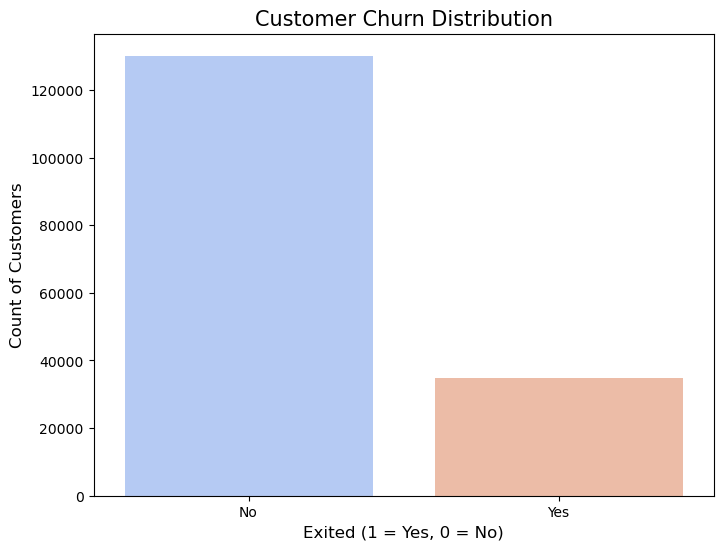

In [548]:
# Bar plot for 'Exited' 
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df_train, palette="coolwarm")
plt.title('Customer Churn Distribution', fontsize=15)
plt.xlabel('Exited (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])  # Make it clear what 0 and 1 represent
plt.show()


#### **Clue 9: Exited - Visual Insights:**

---

`Seeing Who Stays and Who Leaves:` The bar plot would show two main groups of customers – those who stay with the bank and those who leave. The height of each bar would quickly tell us how many are in each group. We'd expect to see a taller bar for the customers who stay, but also a noticeable bar for those who leave.

`Comparing Numbers at a Glance:` The plot would make it easy to see the difference between the number of customers staying and leaving. Even though more customers stay, the plot would show that a good number, about 1 in 5, decide to leave the bank.

`Highlighting the Need for Action:` Seeing the actual number of customers leaving, all in one visual, would underline how important it is for the bank to figure out why customers are leaving and to find ways to make more customers happy and willing to stay.

---

## **Clue 10: Geography**

The count of customers in each geographical region would show us where the bank's customers are primarily located. This can reveal regional markets where the bank is particularly strong or areas where it might have growth opportunities.

In [549]:
df_train["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [550]:
df_train["Geography"].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

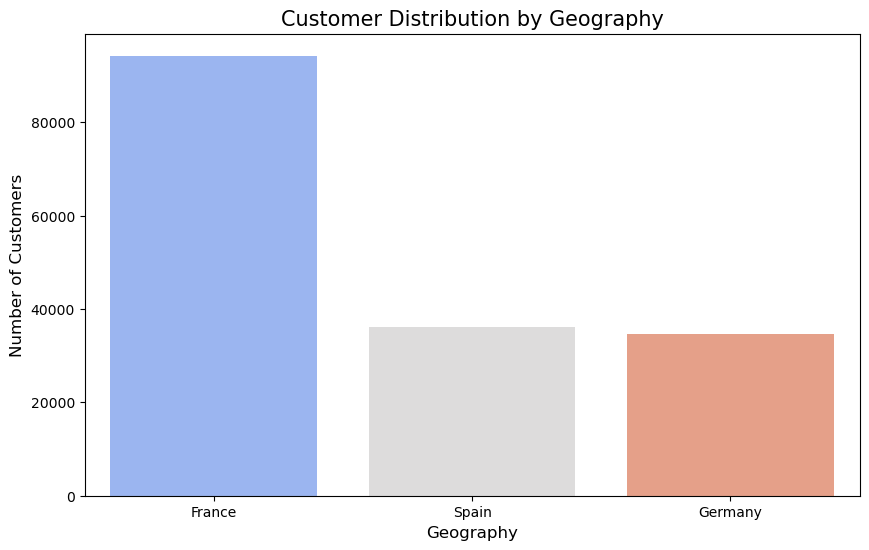

In [551]:
# Creating a DataFrame for the geography counts
geography_counts = pd.DataFrame({
    'Geography': ['France', 'Spain', 'Germany'],
    'Counts': [94215, 36213, 34606]
})

# Plotting the distribution of customers across different geographical regions
plt.figure(figsize=(10, 6))
sns.barplot(x='Geography', y='Counts', data=geography_counts, palette='coolwarm')
plt.title('Customer Distribution by Geography', fontsize=15)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


#### **Clue 10: Geography -Observations:**

---
**Customer Distribution by Geography:**

`France (94,215 Customers):` The bank has the highest number of customers in France. This suggests a strong market presence and potentially a higher brand penetration in the region. The bank's strategies and services seem to resonate well with the French market.

`Spain (36,213 Customers):` Spain represents the second-largest customer base for the bank. While the number is significantly lower than in France, it still indicates a substantial presence. The bank might explore what drives this difference between France and Spain, considering cultural, economic, or competitive factors.

`Germany (34,606 Customers):` Germany has slightly fewer customers than Spain, making it the region with the smallest customer base among the three. This might point to untapped market potential or the need for tailored strategies to enhance market penetration and customer acquisition in Germany.

---

**`Key takeaway:`**

1. The bank could leverage its strong presence in France to further solidify its position, perhaps by deepening customer relationships or introducing new products. In Spain and Germany, the bank might focus on understanding the market dynamics and customer preferences to tailor its strategies for growth and increased market share.

2.  Cultural and economic differences across these regions may influence banking behaviors and product preferences. The bank could benefit from a localized approach, offering region-specific products, services, and marketing campaigns.


---

## **Clue 11: Gender**

Gender might subtly influence the financial narrative. Do the habits and preferences in banking differ in this tale of financial diversity?

In [552]:
df_train["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [553]:
df_train["Gender"].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

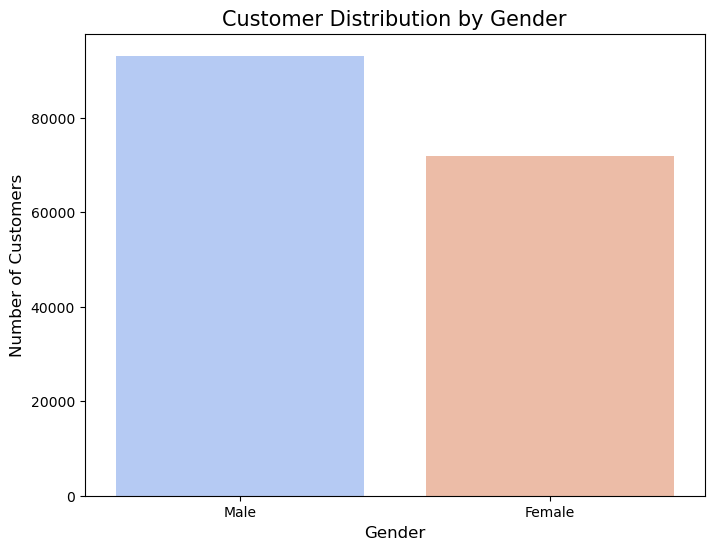

In [554]:
# Creating a DataFrame for the gender counts
gender_counts = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Counts': [93150, 71884]
})

# Plotting the distribution of customers by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Counts', data=gender_counts, palette='coolwarm')
plt.title('Customer Distribution by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


#### **Concise Insights from Gender Distribution:**

`More Male Customers:` 
The bank has more male customers than female customers. This might suggest reviewing how the bank's services and products appeal to different genders.

`Opportunity for Growth:`
The lower number of female customers could represent an untapped market. The bank might explore targeted engagement and marketing strategies to attract more female customers.

`Tailored Services:`
Understanding the specific needs and preferences of male and female customers can help the bank tailor its products and services, ensuring they meet the unique requirements of each gender.

## **Final Thoughts:** 🤔

`Identifiers:`
- id and CustomerId are identifiers and won't be used in analysis. However, they should be kept as they may be necessary for identifying records after analysis. 🆔

`Categorical Data:`
- Geography and Gender are nominal and should be treated as categorical data. 🌍👤

- Surname is also nominal but might not be useful for analysis due to its high cardinality (many unique names). 📛

`Numerical Data:`
- HasCrCard and IsActiveMember are binary (1 or 0). While technically numerical, they represent categorical concepts and could be considered categorical for certain types of analysis. ✔️❌

- Exited is our target variable, indicating churn. It's also binary and could be treated as categorical for visualization purposes. ✔️❌

# 3. **The Plot Thickens - Preparing for a Cleaner Tale** 🕵️🧽

- After a meticulous exploration through the labyrinth of data, our detective story unfolds with every column revealing its secrets. We've traced the footsteps of numerical values, unveiling tales of wealth in 'Balance' and stories of age in 'Tenure'. The categorical characters, from 'Geography' to 'IsActiveMember', have whispered their diverse narratives, each adding depth and color to our investigation.

- Now, as our plot thickens, it's time to ensure that the stage is set perfectly for the drama to unfold.

Just like a detective makes sure every piece of evidence is clear and useful, we're going to make sure our data is neat and tidy.

Here's what we're going to do:

1. `No Missing Pieces:` We'll check every corner to make sure no information is missing. Every clue is important for solving our mystery!
2. `No Repeats:` We'll make sure there are no copies or repeats. Every piece of data should be unique and tell its own part of the story.

Cleaning our data is like making sure our detective's toolkit is ready for action. With everything neat and in order, we'll be ready to solve the mystery of our data!

`So, let's get started and make our data the best it can be. To the cleaning we go!` 🧹✨

In [555]:
df_isnull = df_train.isnull().sum()
df_isnull

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [556]:
# percentage of missing values in each column

df_isnull_percent = df_train.isnull().sum() / len(df_train) * 100
df_isnull_percent

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

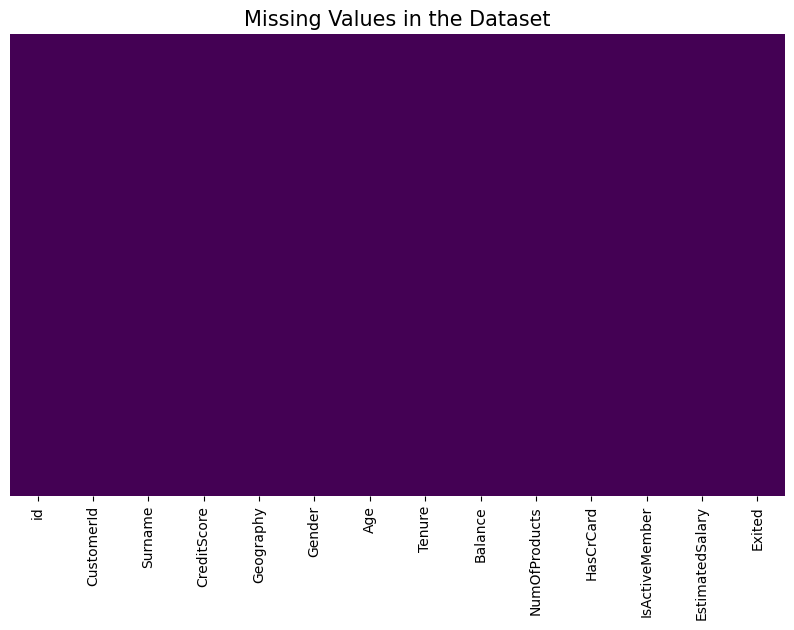

In [557]:
# to visualize the missing values

plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset', fontsize=15)
plt.show()

In [558]:
# to see the duplicate values

df_train.duplicated().sum()

0

#### **Confirming the Clues** 🔎

`Missing Values:`

The meticulous check reaffirms our initial observation – no missing values. Every piece of evidence is accounted for. ✅

`Duplicate Records:`

Our search for duplicates returned zero results. Each record in our dataset is unique, ensuring the integrity of our analysis. ✅

# 4. **Machine learning model training** 🚀 
## - **Crafting Our Data Detective's Toolkit**

- With our data now spick and span, it's time to transition from the role of a meticulous cleaner to that of a masterful craftsman. The stage is set, the clues are polished, and our dataset is ready to reveal its deeper secrets. Now, we enter the exciting phase of model training, where we harness the power of algorithms to sift through the evidence and draw meaningful conclusions.

**In this chapter, we'll be:**

`Choosing the Right Tools:` Just like a detective chooses their tools carefully, we'll select the most suitable machine learning models for our data. Will it be the sharp precision of Decision Trees, the insightful depths of Random Forests, or the intricate patterns recognized by Neural Networks?

`Training and Learning:` Our chosen models will learn from our clean and tidy data. This is where they start to understand the patterns and relationships between all our different clues.

`Testing Our Insights:` Just as a detective tests their theories, we'll test our models to see how well they've learned. We'll use fresh data that the model hasn't seen before to see how well it can predict and analyze.

`Fine-Tuning Our Tools:` A good detective never stops improving. We'll tweak and adjust our models, making sure they're as accurate and insightful as they can be.

#### So, fellow data detectives, let's begin the process of model training. Our analytical adventure is about to get even more exciting! 🕵️‍♂️💻✨

-Label Encoding

In [559]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [560]:
# encode the categorical variables using for loop where object and categoy datatypes are given
for col in df_train.columns:
    if df_train[col].dtype == 'object' or df_train[col].dtype.name == 'category':
        df_train[col] = LabelEncoder().fit_transform(df_train[col])
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


- Categorical variables are typically represented as text values. Before we can use them for model training, we need to convert them to numerical values. This process is called label encoding, and it's a crucial step in preparing categorical data for machine learning models.

### **Target Variable (Exited)**

In [561]:
df_train["Exited"].unique()

array([0, 1], dtype=int64)

In [562]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


### **Training the XGBoost Model** 🚀🔎
Let's harness the power of XGBoost to bring the hidden truths to light and solve the enigma of customer churn! 🎯💥🌟

In [563]:
# train test split
X = df_train.drop(['Exited','Surname','CustomerId'] ,axis=1)
y = df_train['Exited']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy score:  0.8662404944405732
Precision score:  0.8662404944405732
Recall score:  0.8662404944405732
F1 score:  0.8662404944405732


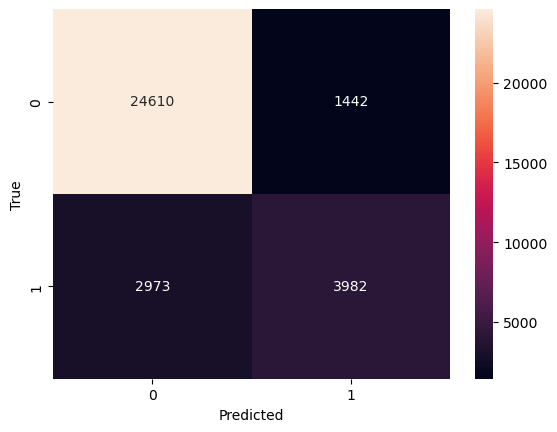

CPU times: total: 22.2 s
Wall time: 4.06 s


In [564]:
%%time
# train the xgboost mode;
xgb = XGBClassifier(n_estimators=500,learning_rate= 0.1,
    max_depth=5, random_state=42)

# fit the model
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [573]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical values
le = LabelEncoder()
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

# predict the test data and create the submission file
y_pred = xgb.predict(df_test.drop(['Surname','CustomerId'],axis=1))
submission['Exited'] = y_pred
submission.to_csv('submission.csv', index=False)

---

#  **Conclusion** 📝

##### **I know you all are excited to know the conclusion of this case study. So, let's see what we have found from this case study.**

Drumroll, please! 🥁🥁🥁

### **🕵️ Key Clues Unearthed:**

In our detective quest to understand why customers are leaving the bank, we've uncovered some vital clues and plotted some smart moves to keep them:

`Age & Location:` Both the young and the old, and folks from certain places, seem to be slipping away.

`Account Matters:` People with really low or really high bank balances, and those juggling too few or too many bank products, often decide to leave.

`Activity Signs:` Customers who don't use their accounts much or avoid the bank's credit card might not be feeling too attached to the bank.

`Service Signals:` A lot of calls for help or unresolved issues can make customers unhappy and more likely to say goodbye.

`Tech Touch:` Customers who don't use online banking or the mobile app might be missing out on the bank's best features.



### **📜 Strategic Scrolls for Retention**

And here's how we're planning to turn things around:

`Get Personal:` Use what we know about our customers to give them offers and services that feel just right for them.

`Say Thanks:` Show our long-term customers some love with rewards to make them stick around.

`Make It Fit`: Let customers pick and mix their banking services so everything feels just right.

`Tech Touch`: Make our online banking smooth, easy, and a joy to use.

`Be There:` Keep an eye on customers who might leave and be ready to help them before they go.

`Listen Well:` Regularly ask for feedback and really use it to make things better.

`Know the Game:` Keep an eye on what other banks are doing, so we're always one step ahead.

These moves are our master plan to keep our bank family close and happy. 🕵️‍♂️✨

In our detective tale, these insights and strategies are the torchlights in the fog, guiding the way to a future where every customer feels like a cherished part of the story. 🕵️✨